# Modelos de difusión de información en redes sociales

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
SEMILLA_ALEATORIEDAD = 123
np.random.seed(SEMILLA_ALEATORIEDAD)

# Modelo de Cascada Independiente

In [4]:
df_congress = pd.read_csv('congress_network\congress.csv', delimiter=';')
congress_graph = nx.DiGraph()
for index, row in df_congress.iterrows():
    congress_graph.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print("Nodos: ", congress_graph.number_of_nodes())
print("Aristas con pesos: ", congress_graph.number_of_edges())

Nodos:  475
Aristas con pesos:  13289


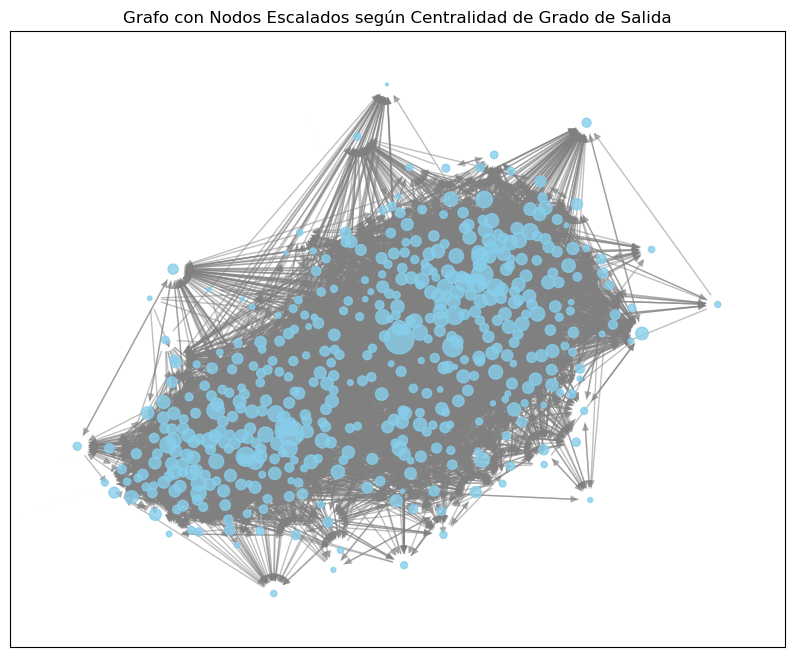

In [21]:
# Determinamos la centralidad del nodo por su grado de salida, porque en este grafo
# la salida indica que el nodo influye en el de entrada
degree_centrality = nx.out_degree_centrality(congress_graph)

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(congress_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
node_sizes = [1000 * degree_centrality[node] for node in congress_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(congress_graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(congress_graph, pos, edgelist=congress_graph.edges(), edge_color='gray', alpha=0.5)
#nx.draw_networkx_labels(congress_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad de Grado de Salida')
plt.show()

In [16]:
df_congress.describe()

Source        Target        Weight
count  13289.000000  13289.000000  13289.000000
mean     237.065769    241.105576      0.005812
std      137.773377    132.009497      0.006946
min        0.000000      0.000000      0.000526
25%      115.000000    132.000000      0.002358
50%      241.000000    242.000000      0.003731
75%      359.000000    354.000000      0.006667
max      474.000000    474.000000      0.130564

In [44]:
df = df_congress['Weight']
df

0        0.002105
1        0.002105
2        0.002105
3        0.004211
4        0.002105
           ...   
13284    0.009615
13285    0.009615
13286    0.009615
13287    0.009615
13288    0.009615
Name: Weight, Length: 13289, dtype: float64

# Cascada Independiente

In [9]:
weighted_degrees = dict(nx.degree(congress_graph,weight='Weight'))
max_degree = max(weighted_degrees.values())
max_degree

284

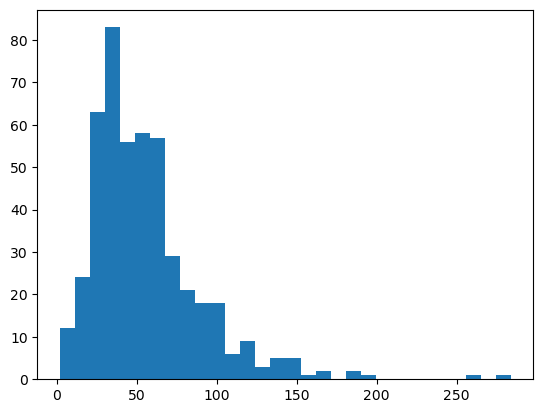

In [10]:
import seaborn as sns
h = plt.hist(weighted_degrees.values(), bins = 30)

In [12]:
subG = congress_graph.subgraph([n for n in weighted_degrees if weighted_degrees[n]>50])

In [41]:
np.random.seed(SEMILLA_ALEATORIEDAD)
active_nodes = []
active_nodes = [node for node in congress_graph.nodes() if np.random.random() <= 0.1]
85 in active_nodes

True

In [42]:
actives = dict()
actives.clear()
for node in congress_graph.nodes():
    if node in active_nodes:
        actives[node] = 0
    else:
        actives[node] = -1
actives

{0.0: -1,
 4.0: -1,
 12.0: -1,
 18.0: -1,
 25.0: -1,
 30.0: -1,
 46.0: -1,
 55.0: -1,
 58.0: -1,
 59.0: -1,
 74.0: -1,
 76.0: -1,
 77.0: -1,
 85.0: 0,
 86.0: -1,
 87.0: -1,
 154.0: -1,
 168.0: -1,
 341.0: -1,
 374.0: -1,
 401.0: -1,
 3.0: -1,
 14.0: -1,
 17.0: -1,
 24.0: -1,
 27.0: -1,
 64.0: -1,
 79.0: -1,
 84.0: -1,
 88.0: -1,
 89.0: 0,
 149.0: -1,
 179.0: -1,
 197.0: -1,
 213.0: -1,
 224.0: -1,
 243.0: -1,
 250.0: -1,
 268.0: -1,
 286.0: -1,
 293.0: -1,
 315.0: -1,
 447.0: -1,
 460.0: -1,
 11.0: -1,
 13.0: -1,
 32.0: -1,
 57.0: -1,
 91.0: -1,
 126.0: -1,
 162.0: -1,
 254.0: -1,
 255.0: -1,
 327.0: -1,
 334.0: -1,
 392.0: -1,
 398.0: -1,
 448.0: -1,
 454.0: -1,
 470.0: -1,
 2.0: -1,
 9.0: -1,
 28.0: -1,
 42.0: -1,
 50.0: -1,
 54.0: 0,
 68.0: -1,
 110.0: -1,
 217.0: -1,
 229.0: -1,
 299.0: 0,
 442.0: -1,
 48.0: -1,
 53.0: -1,
 61.0: 0,
 71.0: -1,
 75.0: -1,
 80.0: -1,
 111.0: -1,
 123.0: -1,
 136.0: -1,
 147.0: -1,
 193.0: -1,
 205.0: -1,
 215.0: -1,
 247.0: -1,
 278.0: -1,
 387.0: 0,

In [43]:
i = 0
for valor in actives.values():
    if valor == 0:
        i+=1
print(i)

47


In [61]:
max_weight = max([e[2]['weight'] for e in congress_graph.edges(data=True)])
print(f'Peso máximo: {max_weight}')
random = np.random.random()
print(f'Número aleatorio sin alterar: {random}')
alterado = max_weight*random
print(f'Alterado: {alterado}')

Peso máximo: 0.130563798
Número aleatorio sin alterar: 0.742587273112503
Alterado: 0.09695501472403169


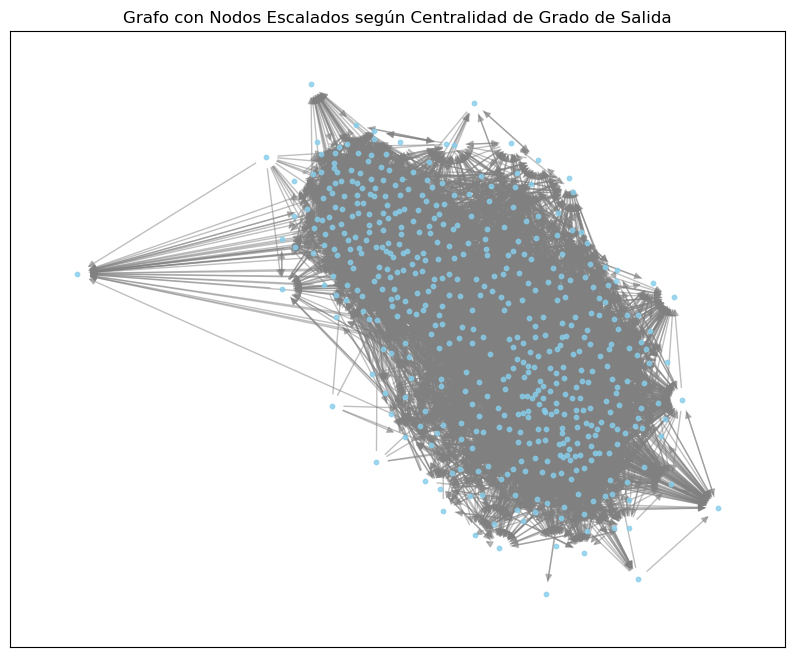

In [4]:
# Determinamos la centralidad del nodo por su grado de salida, porque en este grafo
# la salida indica que el nodo influye en el de entrada
degree_centrality = nx.out_degree_centrality(congress_graph)

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(congress_graph)  # Elegir un layout para el grafo

# Escalar los valores de centralidad para usarlos como tamaños de nodo
#node_sizes = [1000 * degree_centrality[node] for node in congress_graph.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(congress_graph, pos, node_size=30, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(congress_graph, pos, edgelist=congress_graph.edges(), edge_color='gray', alpha=0.5)
#nx.draw_networkx_labels(congress_graph, pos, font_size=12, font_color='black')

# Título y mostrar gráfico
plt.title('Grafo con Nodos Escalados según Centralidad de Grado de Salida')
plt.show()

In [70]:
def independent_cascade2(G, t, infection_times):

    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for node in current_infectious:
        for neighbor in G.successors(node):
            random = max_weight*np.random.random()
            peso = G.get_edge_data(node,neighbor)['weight']
            if infection_times[neighbor] == -1 and random <= peso:

                infection_times[neighbor] = t+1
    
    return infection_times

In [71]:
def independent_cascade3(G, t, infection_times):

    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for node in current_infectious:
        for neighbor in G.successors(node):
            random = np.random.uniform(0, 1)
            peso = G.get_edge_data(node,neighbor)['weight']
            if infection_times[neighbor] == -1 and random <= peso:

                infection_times[neighbor] = t+1
    
    return infection_times

In [72]:
def plot_G2(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.figure(figsize=(10, 8))
    for node in G.nodes():
        #size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=30, node_color='#feba02')
        elif infection_times.get(node,9999999)<t and infection_times.get(node,9999999) > -1:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=30, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=30, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', alpha=0.5)

In [45]:
count_infected(actives)

47

47
Peso 0.002436054 vs Random: 0.000986114189697299, con InfectionTime: -1
Peso 0.001218027 vs Random: 0.0004217065088352408, con InfectionTime: -1
Peso 0.01242236 vs Random: 0.008069831467437637, con InfectionTime: -1
Peso 0.001650165 vs Random: 0.0012698812427762915, con InfectionTime: -1
Peso 0.005434783 vs Random: 0.004251705500472561, con InfectionTime: -1
Peso 0.021021021 vs Random: 0.0014790838284928622, con InfectionTime: -1
Peso 0.004237288 vs Random: 0.0017302133005168453, con InfectionTime: -1
Peso 0.002840909 vs Random: 0.0008585647285212566, con InfectionTime: -1
Peso 0.00422833 vs Random: 0.002233232176352517, con InfectionTime: -1
Peso 0.002114165 vs Random: 1.7749123047711166e-05, con InfectionTime: -1
Peso 0.012684989 vs Random: 0.00976202641554473, con InfectionTime: -1
Peso 0.005194805 vs Random: 0.0018932926715497069, con InfectionTime: -1
Peso 0.005128205 vs Random: 0.001632230186843382, con InfectionTime: -1
Peso 0.051282051 vs Random: 0.003661480036105304, con In

Peso 0.01 vs Random: 0.009584532887525062, con InfectionTime: -1
Peso 0.00754717 vs Random: 0.004894867895811721, con InfectionTime: -1
Peso 0.01754386 vs Random: 0.014880059624522728, con InfectionTime: -1
177
Peso 0.002227171 vs Random: 0.0013007020143612216, con InfectionTime: -1
Peso 0.002227171 vs Random: 0.00035916815869300805, con InfectionTime: -1
Peso 0.008143322 vs Random: 0.0037364923790958577, con InfectionTime: -1
180
180
180
180
180


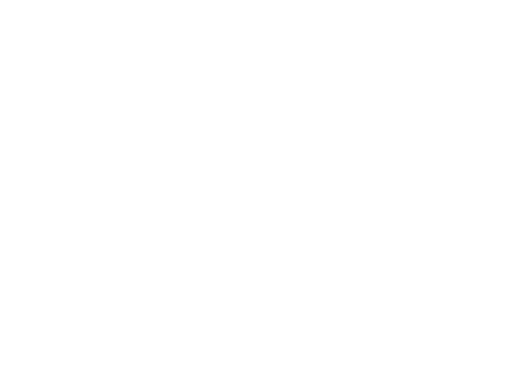

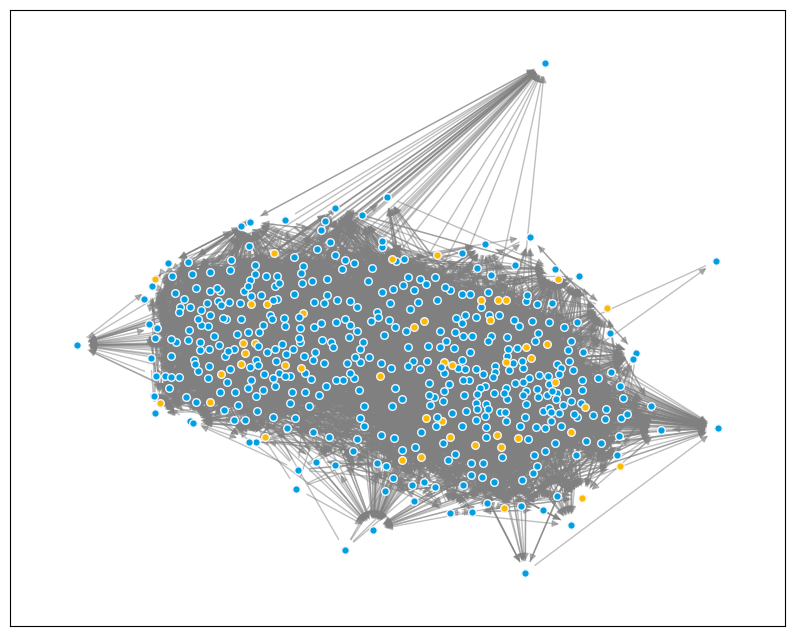

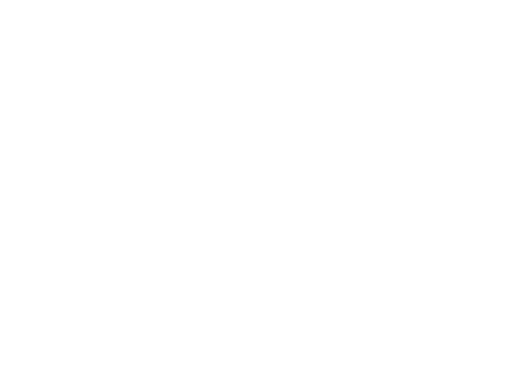

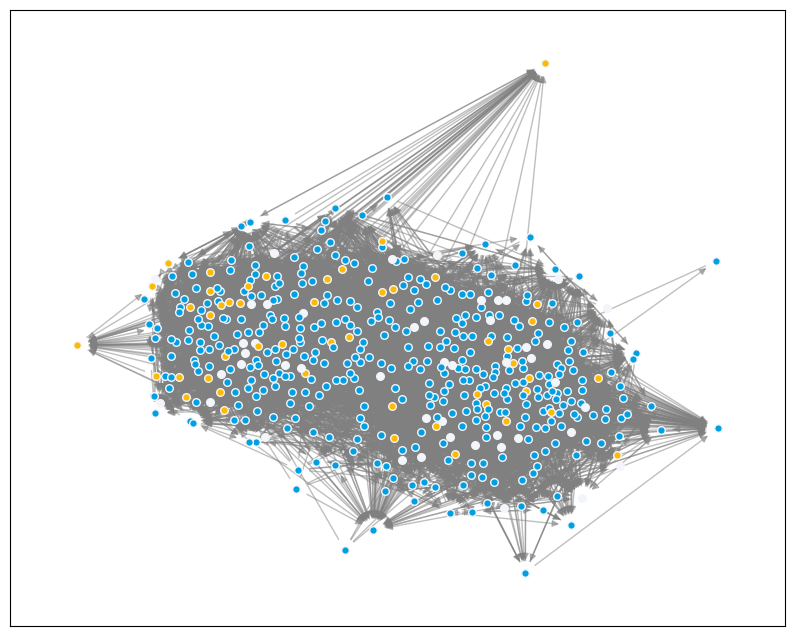

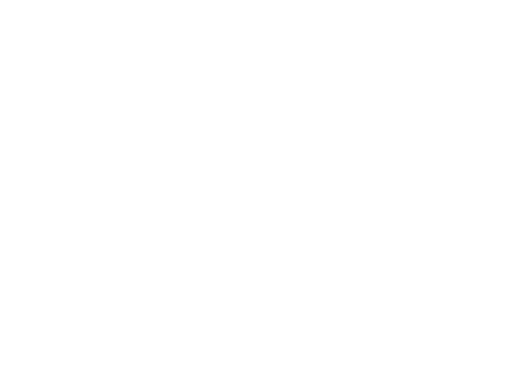

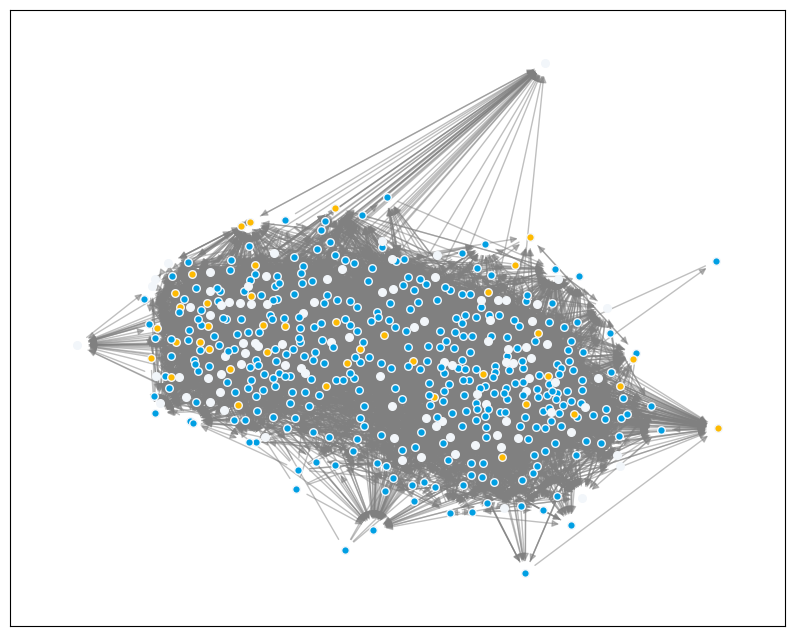

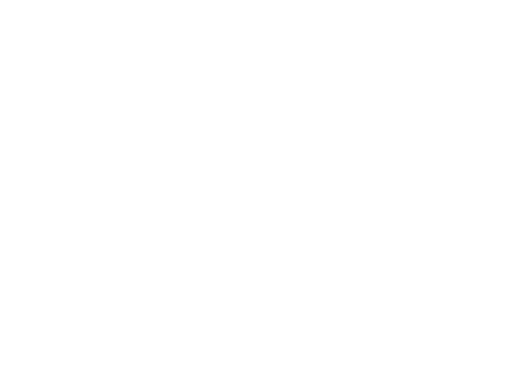

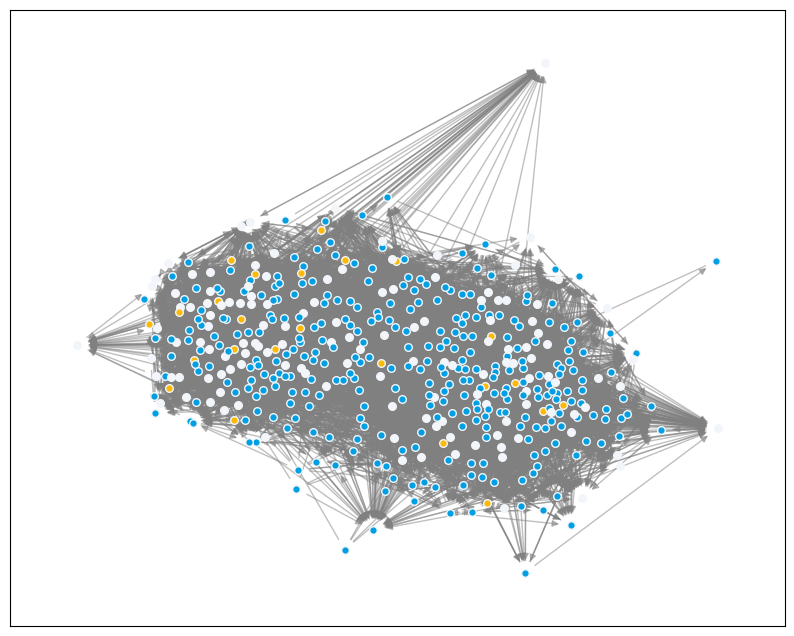

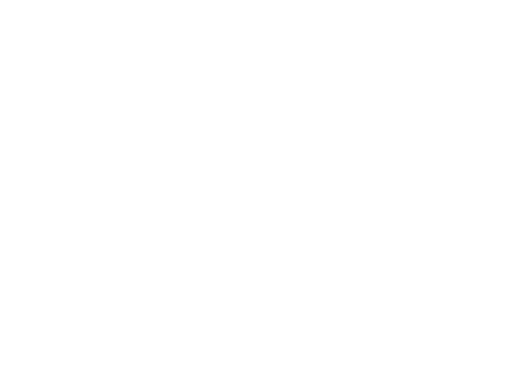

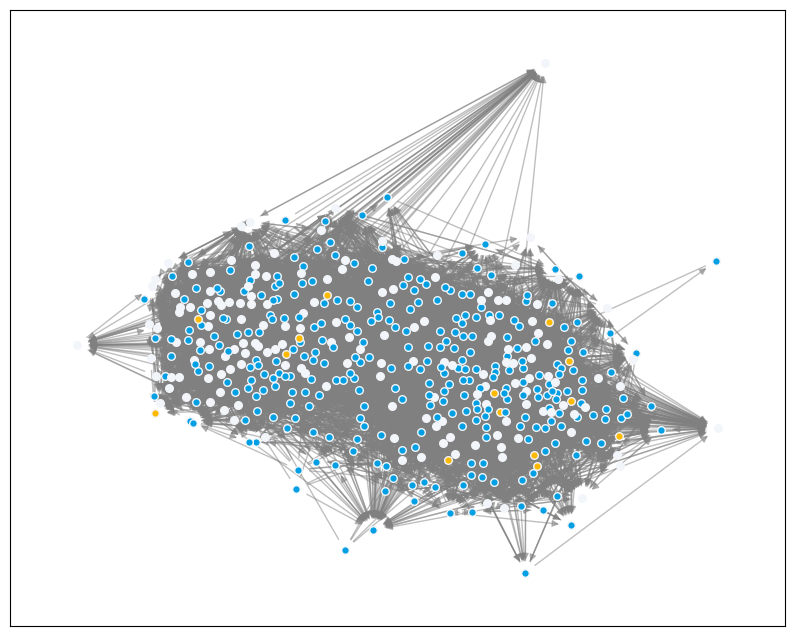

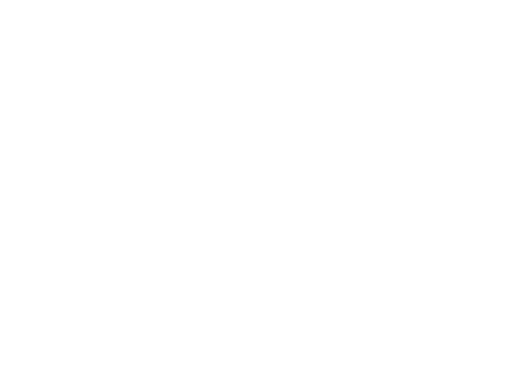

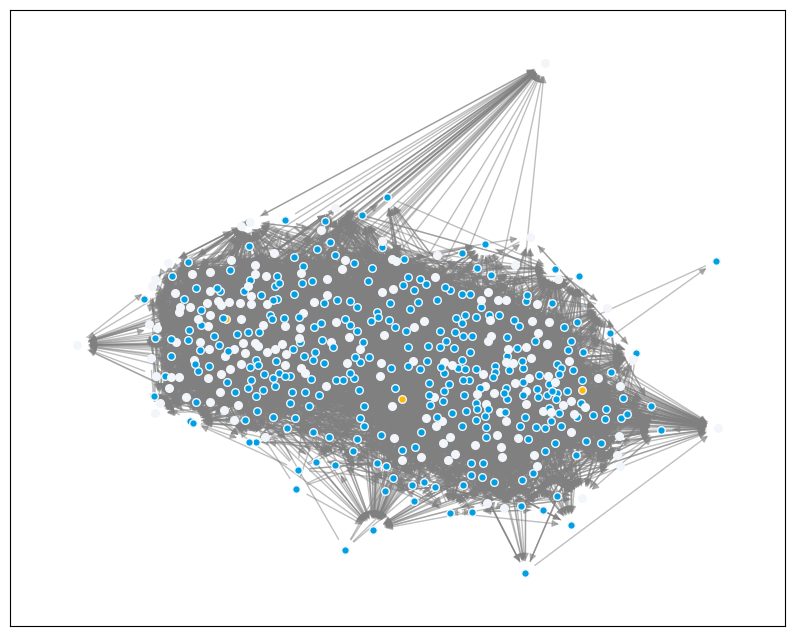

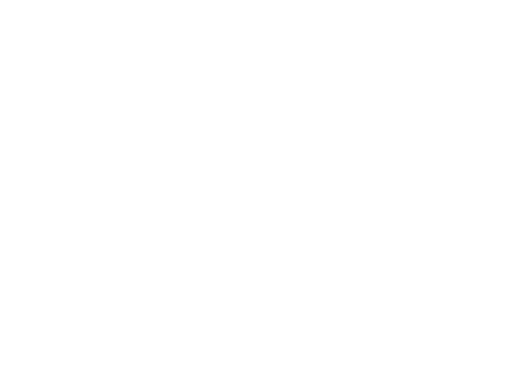

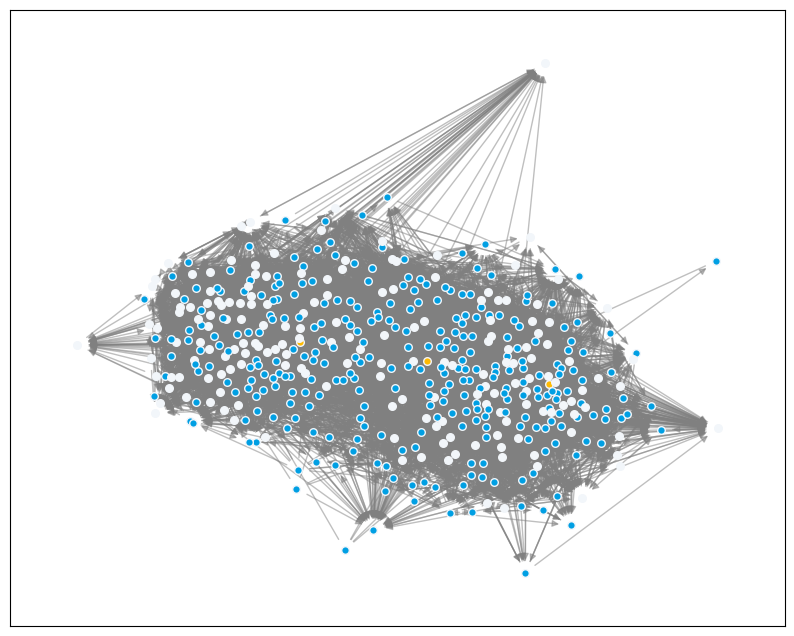

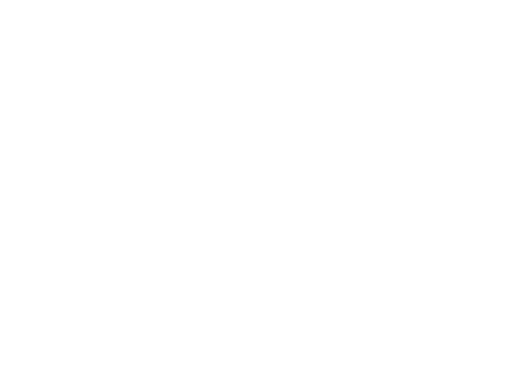

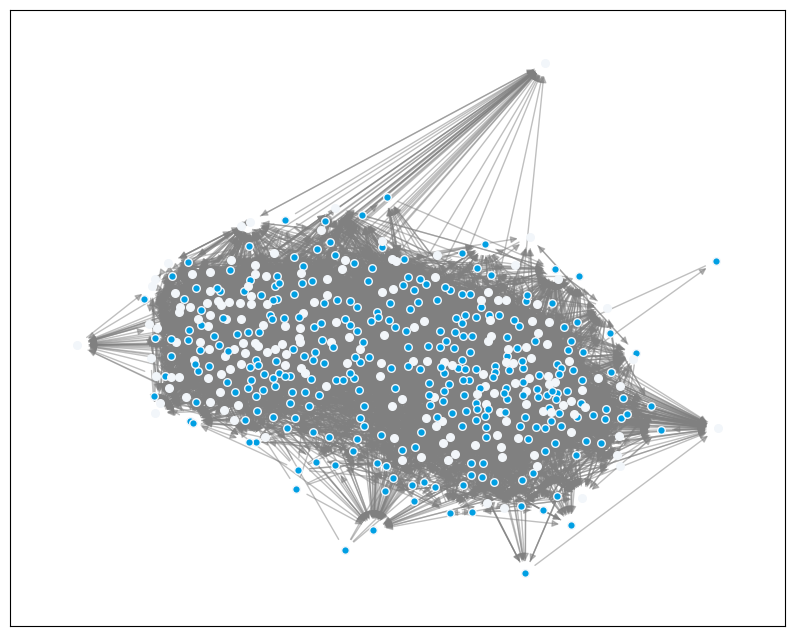

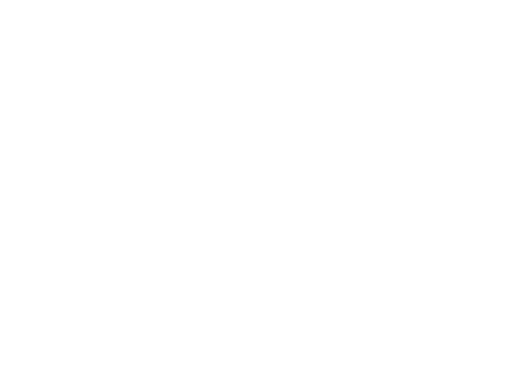

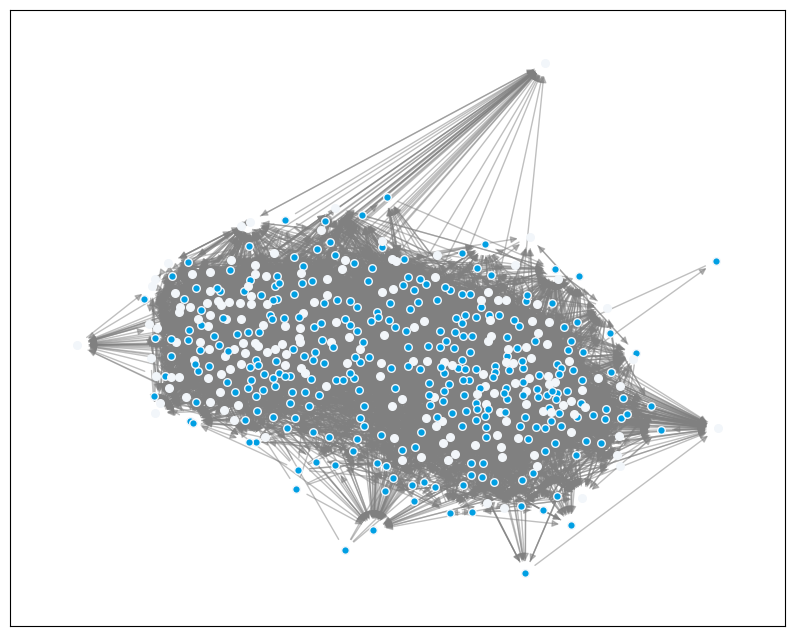

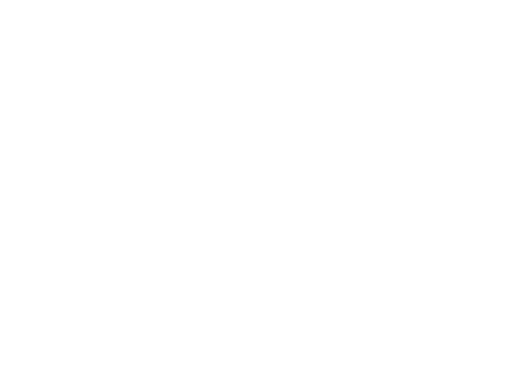

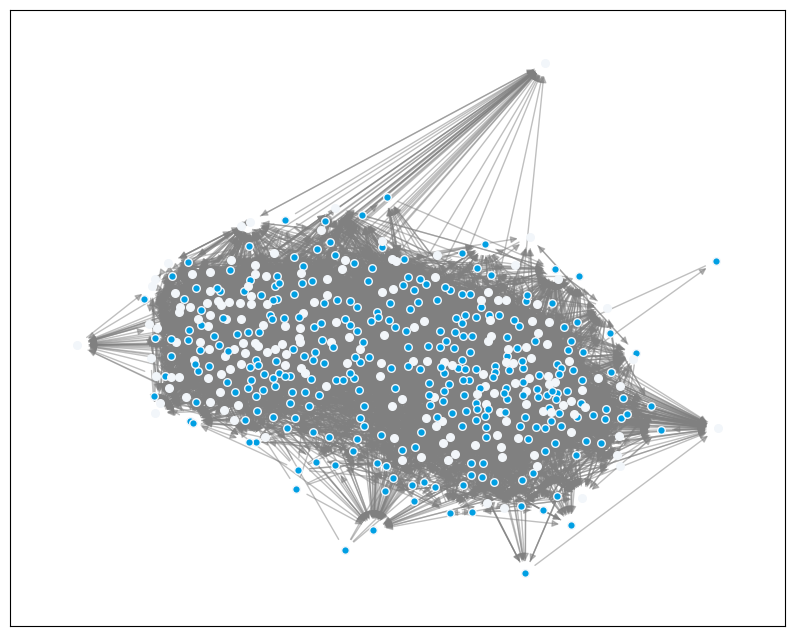

In [47]:
def count_infected(diccionario):
    i=0
    for valor in diccionario.values():
        if valor > -1:
            i+=1
    return i

infection_times = actives
pos = nx.spring_layout(congress_graph)
print(count_infected(infection_times))
for t in range(10):
    plot_G2(congress_graph, pos, infection_times, t)
    infection_times = independent_cascade2(congress_graph, t, infection_times)
    print(count_infected(infection_times))

47
58
58
58
58
58


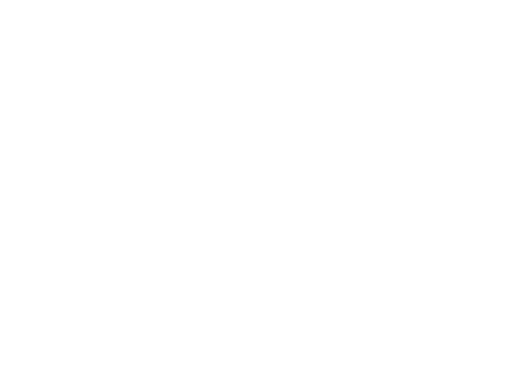

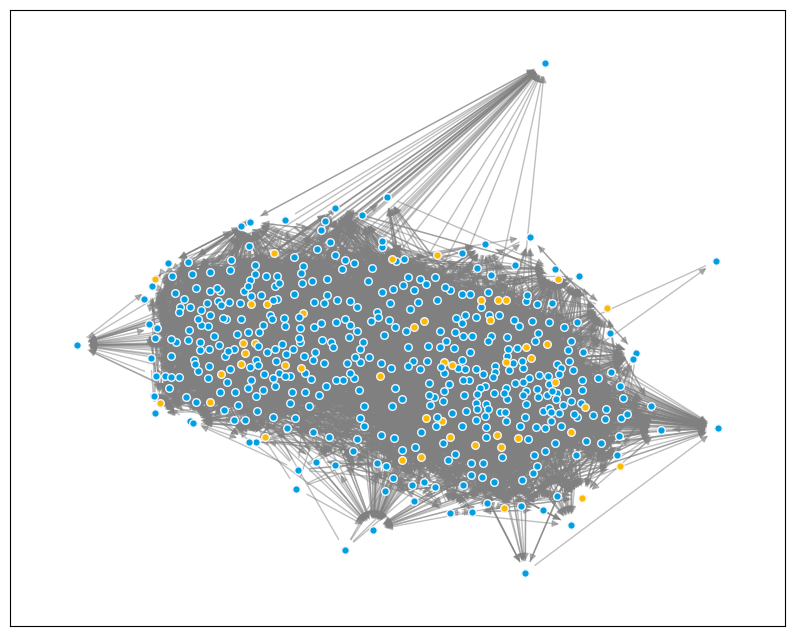

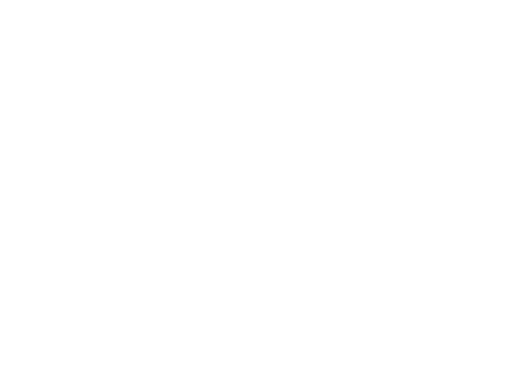

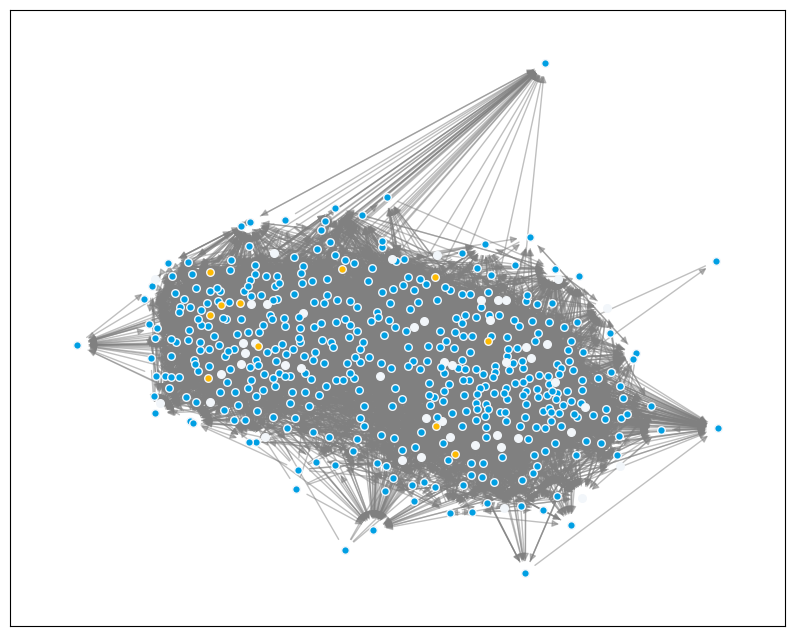

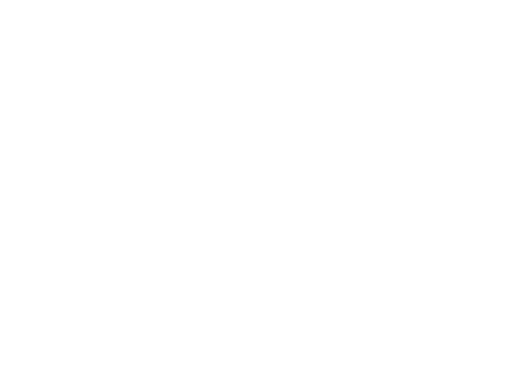

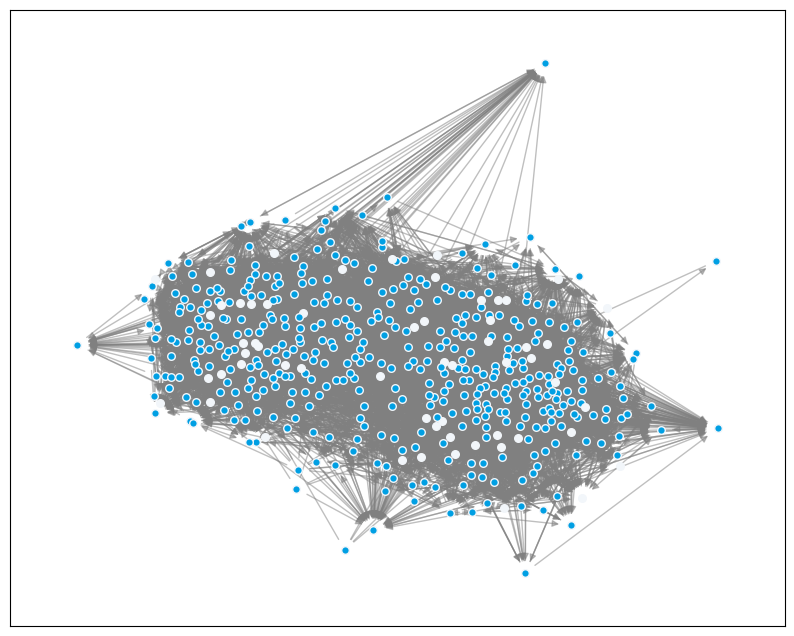

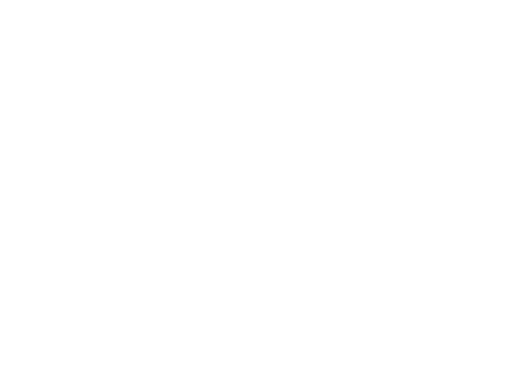

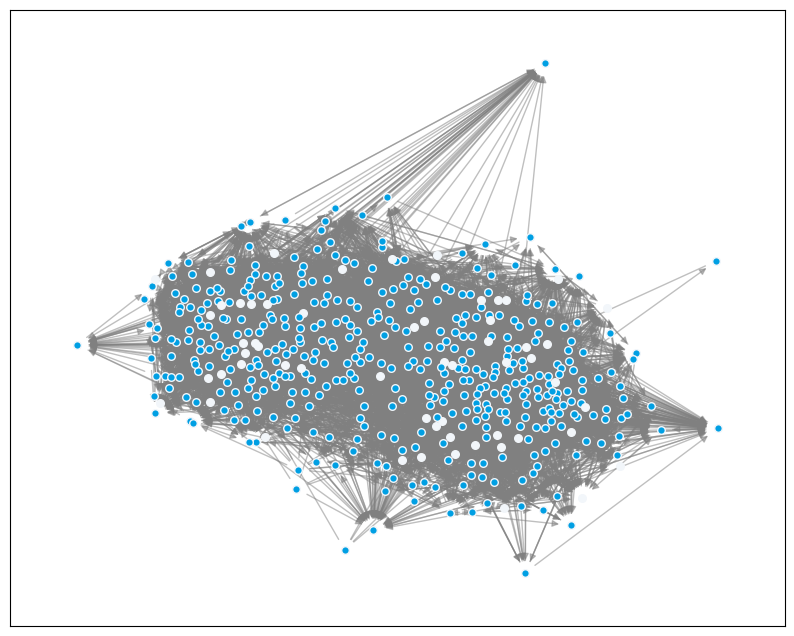

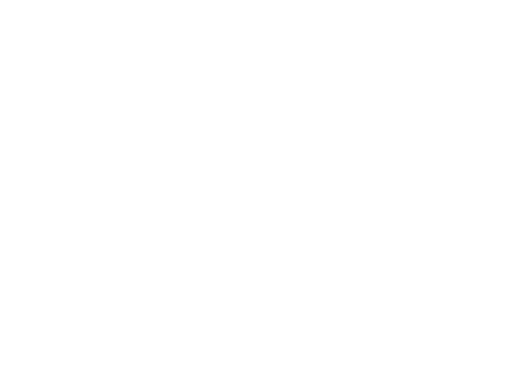

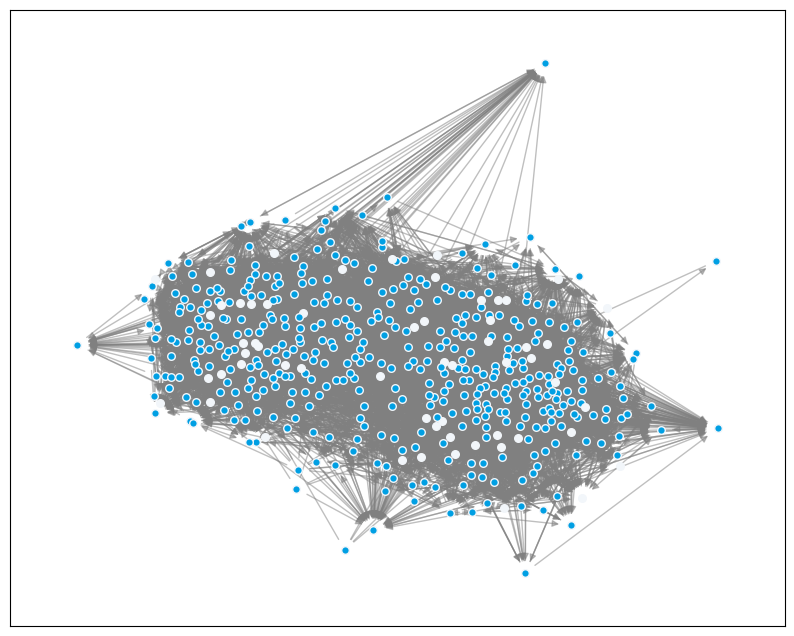

In [76]:
def count_infected(diccionario):
    i=0
    for valor in diccionario.values():
        if valor > -1:
            i+=1
    return i

infection_times = actives
pos = nx.spring_layout(congress_graph)
print(count_infected(infection_times))
for t in range(5):
    plot_G2(congress_graph, pos, infection_times, t)
    infection_times = independent_cascade3(congress_graph, t, infection_times)
    print(count_infected(infection_times))

# Umbral Lineal

In [5]:
def linear_threshold(G, t, infection_times):

    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    thresholds = {node: np.random.random() for node in G.nodes()}

    current_infectious = [n for n in infection_times if infection_times[n]==t]

    for node in G.nodes():
        if node not in current_infectious:
            total_influence = sum(G[u][node]['weight'] for u in G.predecessors(node) if infection_times[u] > -1)
            if total_influence >= thresholds[node]:
                infection_times[node] = t+1
    
    return infection_times


In [6]:
np.random.seed(SEMILLA_ALEATORIEDAD)
active_nodes = []
active_nodes = [node for node in congress_graph.nodes() if np.random.uniform(0, 1) <= 0.1]
85 in active_nodes

True

In [7]:
actives = dict()
actives.clear()
for node in congress_graph.nodes():
    if node in active_nodes:
        actives[node] = 0
    else:
        actives[node] = -1
actives

{0.0: -1,
 4.0: -1,
 12.0: -1,
 18.0: -1,
 25.0: -1,
 30.0: -1,
 46.0: -1,
 55.0: -1,
 58.0: -1,
 59.0: -1,
 74.0: -1,
 76.0: -1,
 77.0: -1,
 85.0: 0,
 86.0: -1,
 87.0: -1,
 154.0: -1,
 168.0: -1,
 341.0: -1,
 374.0: -1,
 401.0: -1,
 3.0: -1,
 14.0: -1,
 17.0: -1,
 24.0: -1,
 27.0: -1,
 64.0: -1,
 79.0: -1,
 84.0: -1,
 88.0: -1,
 89.0: 0,
 149.0: -1,
 179.0: -1,
 197.0: -1,
 213.0: -1,
 224.0: -1,
 243.0: -1,
 250.0: -1,
 268.0: -1,
 286.0: -1,
 293.0: -1,
 315.0: -1,
 447.0: -1,
 460.0: -1,
 11.0: -1,
 13.0: -1,
 32.0: -1,
 57.0: -1,
 91.0: -1,
 126.0: -1,
 162.0: -1,
 254.0: -1,
 255.0: -1,
 327.0: -1,
 334.0: -1,
 392.0: -1,
 398.0: -1,
 448.0: -1,
 454.0: -1,
 470.0: -1,
 2.0: -1,
 9.0: -1,
 28.0: -1,
 42.0: -1,
 50.0: -1,
 54.0: 0,
 68.0: -1,
 110.0: -1,
 217.0: -1,
 229.0: -1,
 299.0: 0,
 442.0: -1,
 48.0: -1,
 53.0: -1,
 61.0: 0,
 71.0: -1,
 75.0: -1,
 80.0: -1,
 111.0: -1,
 123.0: -1,
 136.0: -1,
 147.0: -1,
 193.0: -1,
 205.0: -1,
 215.0: -1,
 247.0: -1,
 278.0: -1,
 387.0: 0,

In [8]:
i = 0
for valor in actives.values():
    if valor == 0:
        i+=1
print(i)

47


47
56
65
72
82
92
107
116
128
136
149


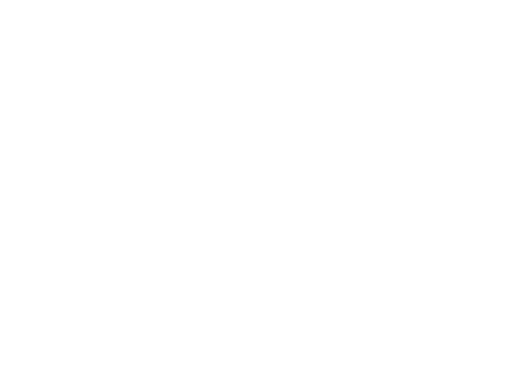

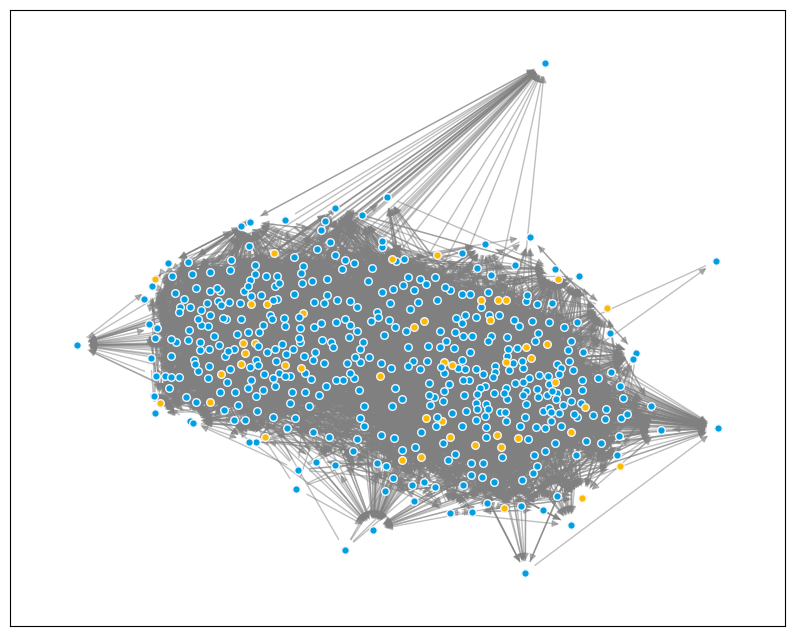

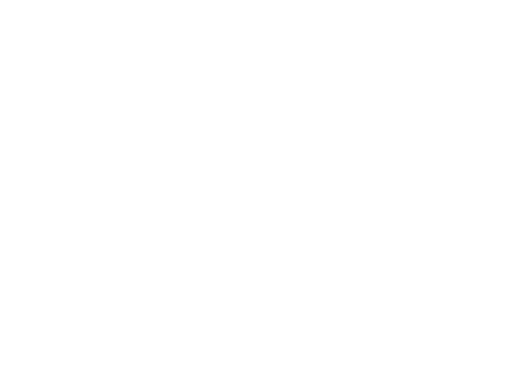

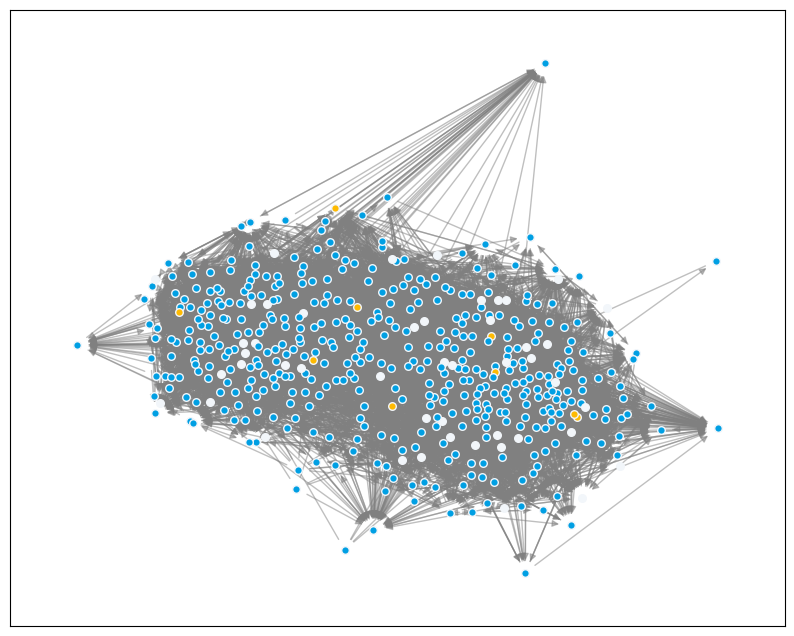

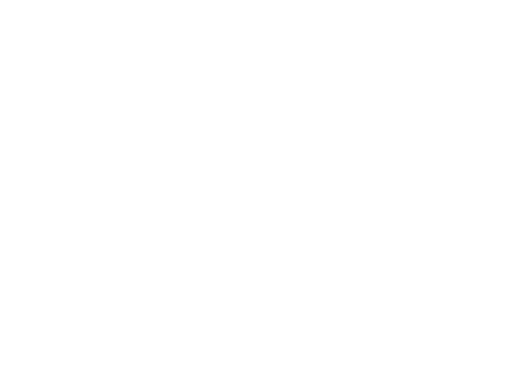

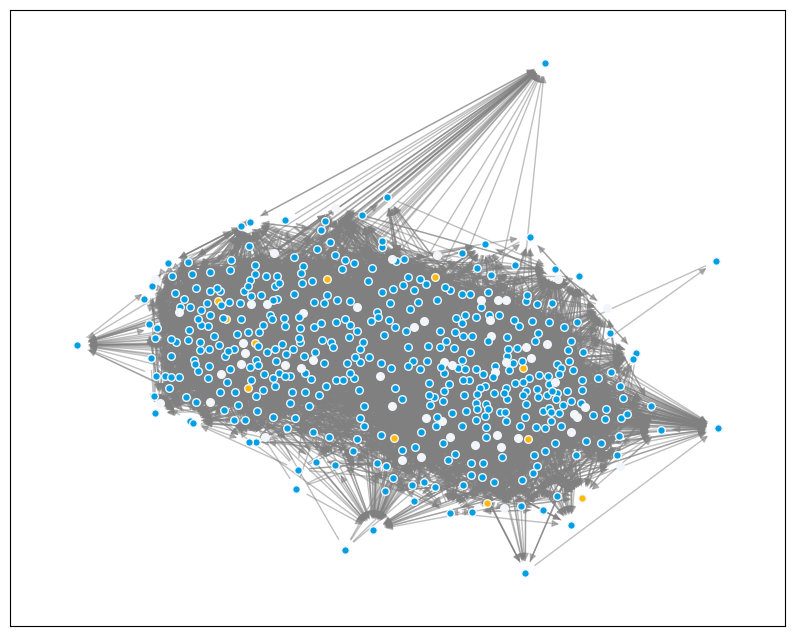

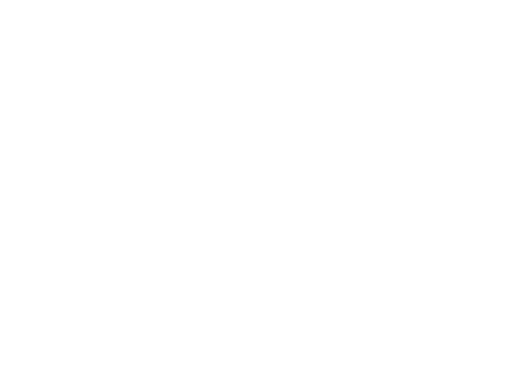

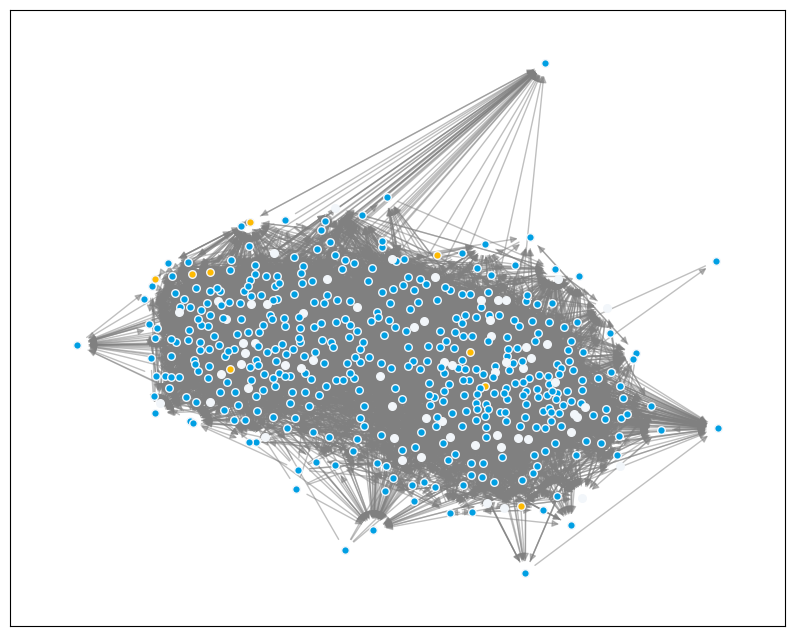

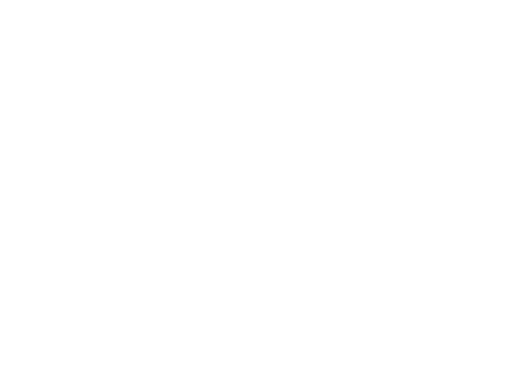

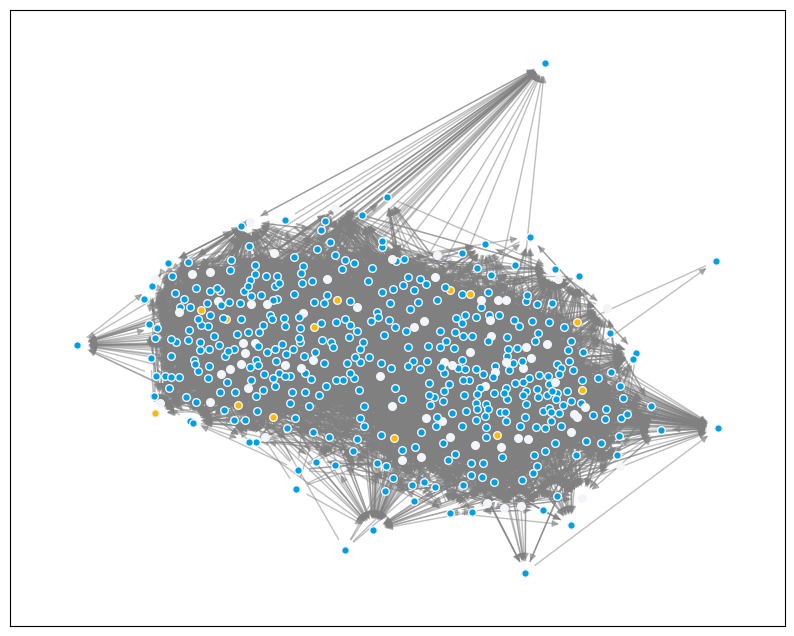

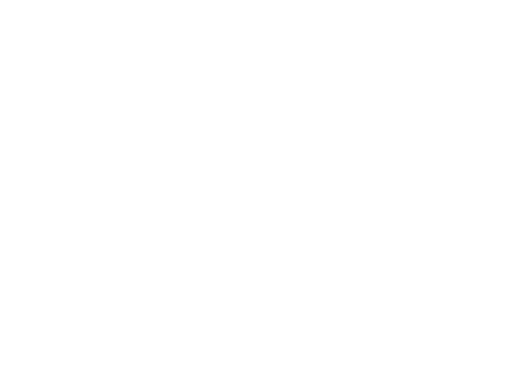

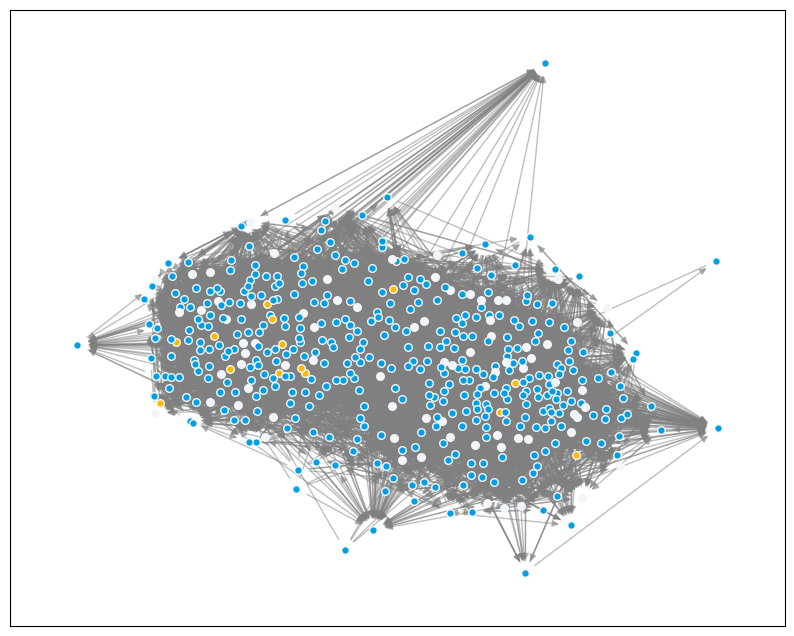

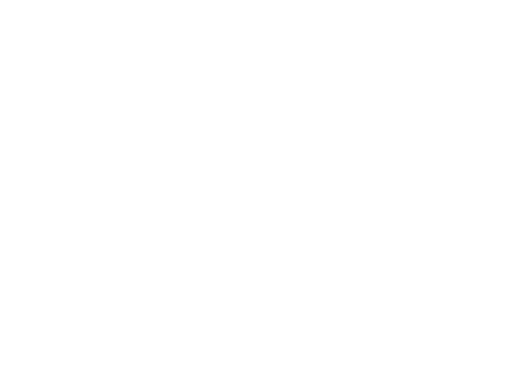

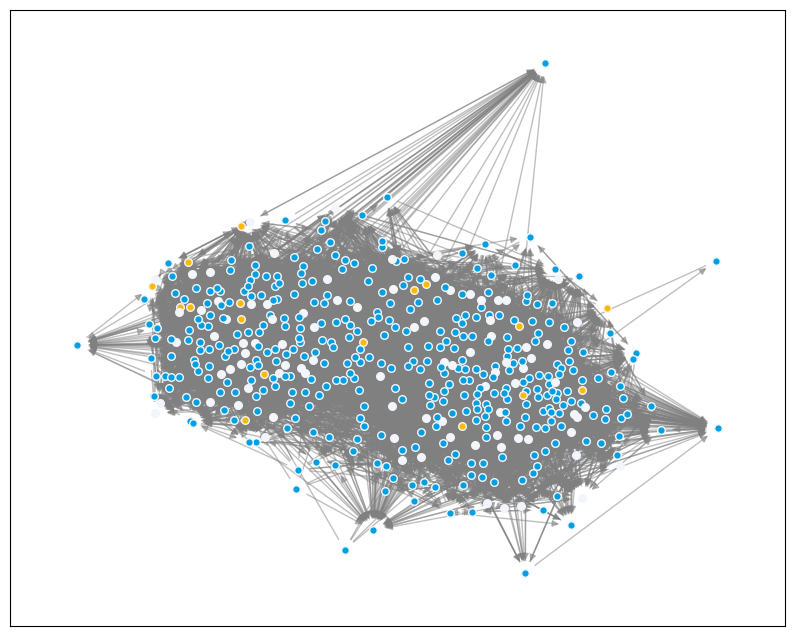

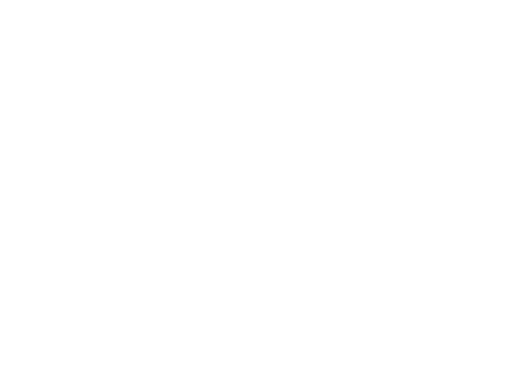

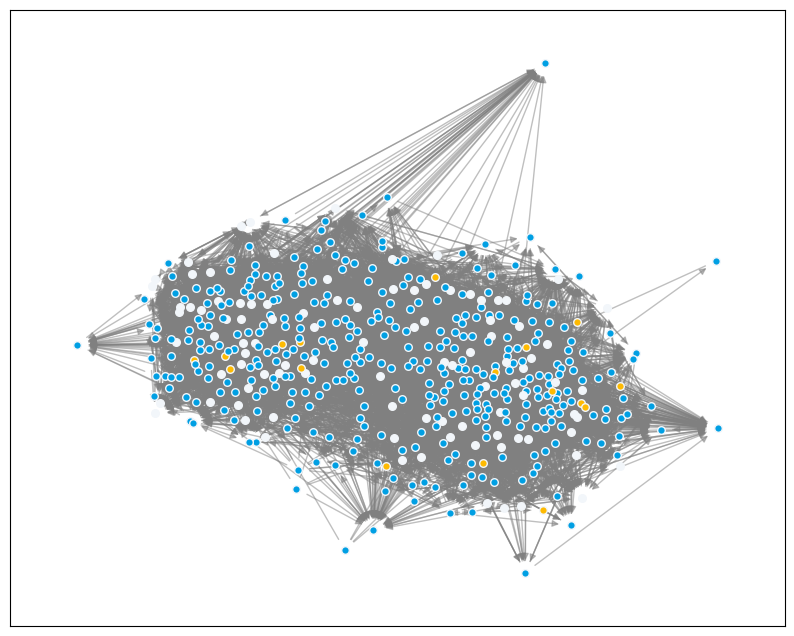

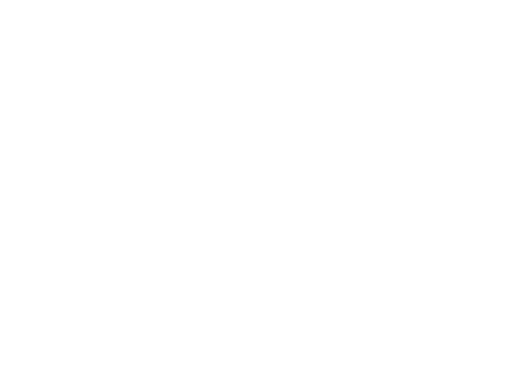

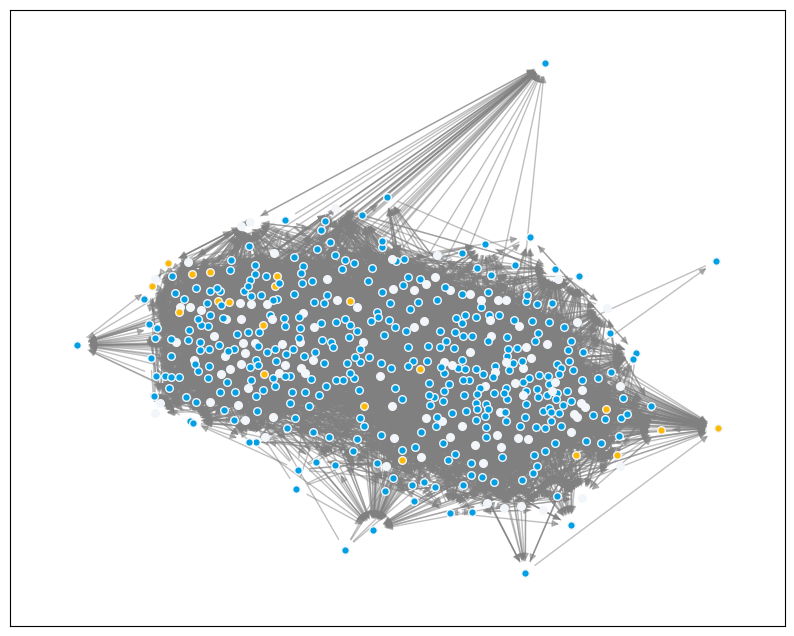

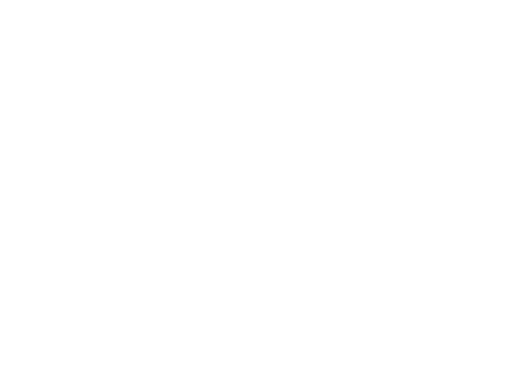

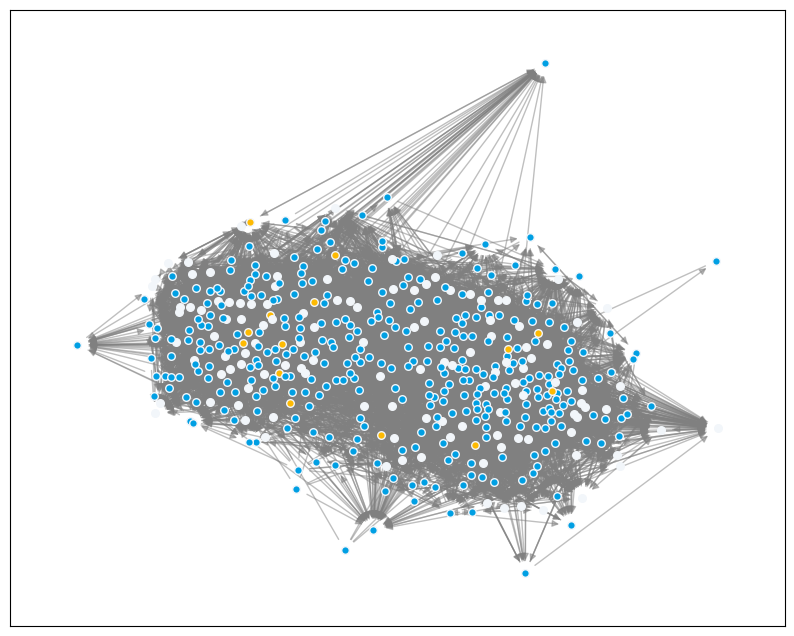

In [66]:
def count_infected(diccionario):
    i=0
    for valor in diccionario.values():
        if valor > -1:
            i+=1
    return i

infection_times = actives
pos = nx.spring_layout(congress_graph)
print(count_infected(infection_times))
for t in range(10):
    plot_G2(congress_graph, pos, infection_times, t)
    infection_times = linear_threshold(congress_graph, t, infection_times)
    #print(active)
    print(count_infected(infection_times))
    #print(infection_times)